<h1>Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [207]:
def sum_prod(X, V):
    res = np.zeros((X[0].shape[0], 1))
    for matrix, vector in zip(X, V):
        vec = np.array(vector).reshape(-1, 1)
        res += matrix @ vec
    return res


class TestSumProd(unittest.TestCase):
    def test_sum_prod_basic(self):
        X = [np.array([[1, 2],
                       [3, 4]]),
             np.array([[0, 1],
                       [1, 0]])]
        V = [np.array([1, 0]), np.array([0, 1])]
        result = sum_prod(X, V)
        expected = np.array([[1], [3]]) + np.array([[1], [0]])
        self.assertEqual(result.tolist(), [[2.0], [3.0]])

    def test_sum_prod_single_pair(self):
        X = [np.array([[2, 3]])]
        V = [np.array([1, 1])]
        result = sum_prod(X, V)
        self.assertEqual(result.tolist(), [[5.0]])


loader = unittest.TestLoader()
suite = loader.loadTestsFromTestCase(TestSumProd)
runner = unittest.TextTestRunner()
result = runner.run(suite)
        

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [199]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)


class TestBinarize(unittest.TestCase):
    def test(self):
        self.assertEqual(binarize(np.array([[1, 2], [0.3, 0.1], [1, -1]])).tolist(), np.array([[1, 1], [0, 0], [1, 0]]).tolist())
        self.assertEqual(binarize(np.array([[1, 2], [0.3, 0.1], [1, -1]]), threshold=10).tolist(), np.array([[0, 0], [0, 0], [0, 0]]).tolist())
        self.assertEqual(binarize(np.array([[20, 21], [19, 100], [20, 20]]), threshold=10).tolist(), np.array([[1, 1], [1, 1], [1, 1]]).tolist())
        self.assertEqual(binarize(np.array([[2, 2, 3], [0.3, 0.1, 0.8]]), threshold=1).tolist(), np.array([[1, 1, 1], [0, 0, 0]]).tolist())
        self.assertEqual(binarize(np.array([1, 2, 3])).tolist(), np.array([1, 1, 1]).tolist())

loader = unittest.TestLoader()
suite = loader.loadTestsFromTestCase(TestBinarize)
runner = unittest.TextTestRunner()
result = runner.run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [211]:
def unique_rows(mat):
    return [np.unique(row).tolist() for row in mat]


def unique_columns(mat):
    return [np.unique(col).tolist() for col in mat.T]


class TestUnique(unittest.TestCase):
    def test_unique_rows_basic(self):
        mat = np.array([[1, 2, 2, 1],
                        [3, 3, 4, 4]])
        result = unique_rows(mat)
        expected = [[1, 2], [3, 4]]
        self.assertEqual(result, expected)

    def test_unique_rows_with_negatives(self):
        mat = np.array([[-1, 0, -1],
                        [2, 2, 2]])
        result = unique_rows(mat)
        expected = [[-1, 0], [2]]
        self.assertEqual(result, expected)

    def test_unique_rows_empty_row(self):
        mat = np.array([[]])
        result = unique_rows(mat)
        expected = [[]]
        self.assertEqual(result, expected)

    def test_unique_columns_basic(self):
        mat = np.array([[1, 2, 1],
                        [1, 3, 1],
                        [2, 3, 1]])
        result = unique_columns(mat)
        expected = [[1, 2], [2, 3], [1]]
        self.assertEqual(result, expected)

    def test_unique_columns_single_column(self):
        mat = np.array([[5], [5], [6]])
        result = unique_columns(mat)
        expected = [[5, 6]]
        self.assertEqual(result, expected)

    def test_unique_columns_single_row(self):
        mat = np.array([[1, 2, 3]])
        result = unique_columns(mat)
        expected = [[1], [2], [3]]
        self.assertEqual(result, expected)


loader = unittest.TestLoader()
suite = loader.loadTestsFromTestCase(TestUnique)
runner = unittest.TextTestRunner()
result = runner.run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.005s

OK


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

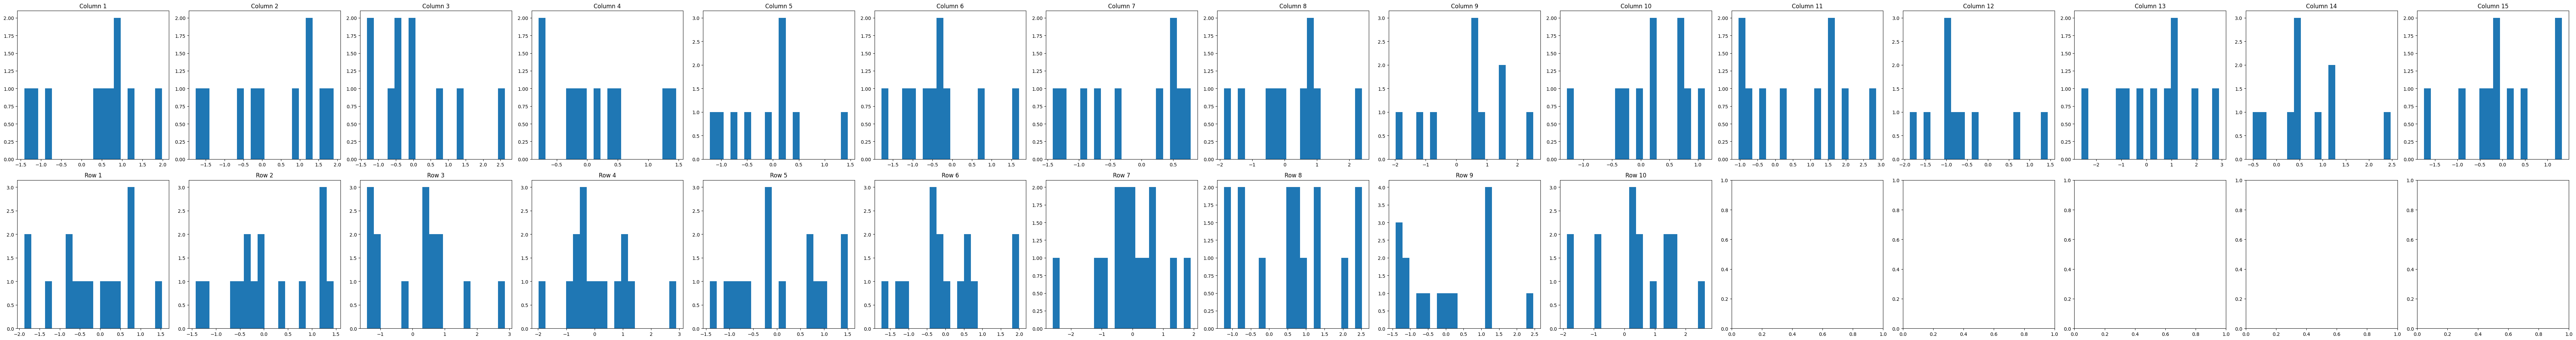

Matrix:
[[-0.85367976 -1.76908195 -1.2550201  -0.73792783  0.45492782 -0.64785901
   0.77917938  0.71513251  0.76443461  0.21886081  1.53119619 -1.87757487
  -0.18046743 -0.51033838  0.15406735]
 [ 1.21471888 -1.42270225  0.77285137  0.43190256  1.44817833 -0.24365985
  -0.34546261 -0.04913595 -1.16329964 -0.28471569 -0.45173857 -0.6097975
   1.24303935  1.25161403 -0.10559188]
 [-1.13068411  0.92850679 -1.32636893  0.49207238 -1.02559094  1.69454597
   0.5267997   0.7451143   0.57096049 -1.28915709  2.86212802 -1.40871541
   0.39496762  0.47974817 -0.17020308]
 [ 0.89972413  1.18453471  1.34072154  0.1361272  -0.45405221 -0.26398609
  -0.74150121 -0.44780933 -1.98427285  1.12075958 -0.67201053 -0.89567097
   2.8948033   0.42444841 -0.44655526]
 [ 0.85541785 -0.55303312 -0.72442055 -0.24125185  0.12330945 -0.21305561
  -1.41703028  0.93847868  1.50014594  0.6605292  -1.00614507  1.43454543
   0.72847125 -0.24555176 -0.92547462]
 [ 0.76853897 -0.16203809 -0.07699524 -0.04110164 -1.22172

In [ ]:
def fill_matrix_and_analyze(m, n):
    matrix = np.random.randn(m, n)
    
    mean_columns = np.mean(matrix, axis=0)
    var_columns = np.var(matrix, axis=0)
    
    mean_rows = np.mean(matrix, axis=1)
    var_rows = np.var(matrix, axis=1)
    
    fig, axs = plt.subplots(2, max(m, n), figsize=(5 * max(m, n), 10))
    for i in range(n):
        axs[0, i].hist(matrix[:, i], bins=20)
        axs[0, i].set_title(f'Column {i+1}')
    
    for i in range(m):
        axs[1, i].hist(matrix[i, :], bins=20)
        axs[1, i].set_title(f'Row {i+1}')
    
    plt.tight_layout()
    plt.show()
    
    return matrix, mean_columns, var_columns, mean_rows, var_rows


matrix, mean_columns, var_columns, mean_rows, var_rows = fill_matrix_and_analyze(10, 15)

print("Matrix:")
print(matrix)
print("\nМатОжидание столбцов:", mean_columns)
print("Дисперсия столбцов:", var_columns)
print("\nМатОжидание строк:", mean_rows)
print("Дисперсия строк:", var_rows)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [ ]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            matrix[i, j] = a if (i + j) % 2 == 0 else b
    return matrix


class TestChess(unittest.TestCase):
    def test_original_chess(self):
        self.assertEqual(chess(8, 8, 0, 1).tolist(), [[0, 1, 0, 1, 0, 1, 0, 1], 
                                                      [1, 0, 1, 0, 1, 0, 1, 0], 
                                                      [0, 1, 0, 1, 0, 1, 0, 1], 
                                                      [1, 0, 1, 0, 1, 0, 1, 0], 
                                                      [0, 1, 0, 1, 0, 1, 0, 1], 
                                                      [1, 0, 1, 0, 1, 0, 1, 0],
                                                      [0, 1, 0, 1, 0, 1, 0, 1], 
                                                      [1, 0, 1, 0, 1, 0, 1, 0]])
        
    def test_1(self):
        result = chess(2, 5, 1, 2).tolist()
        expected = [[1, 2, 1, 2, 1], [2, 1, 2, 1, 2]]
        self.assertEqual(result, expected)

    def test_2(self):
        result = chess(3, 6, 0, 1).tolist()
        expected = [[0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 1]]
        self.assertEqual(result, expected)

    def test_3(self):
        result = chess(3, 3, 0, 1).tolist()
        expected = [[0, 1, 0], [1, 0, 1], [0, 1, 0]]
        self.assertEqual(result, expected)

    def test_3(self):
        result = chess(2, 2, -3, 5).tolist()
        expected = [[-3, 5], [5, -3]]
        self.assertEqual(result, expected)


loader = unittest.TestLoader()
suite = loader.loadTestsFromTestCase(TestChess)
runner = unittest.TextTestRunner()
result = runner.run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

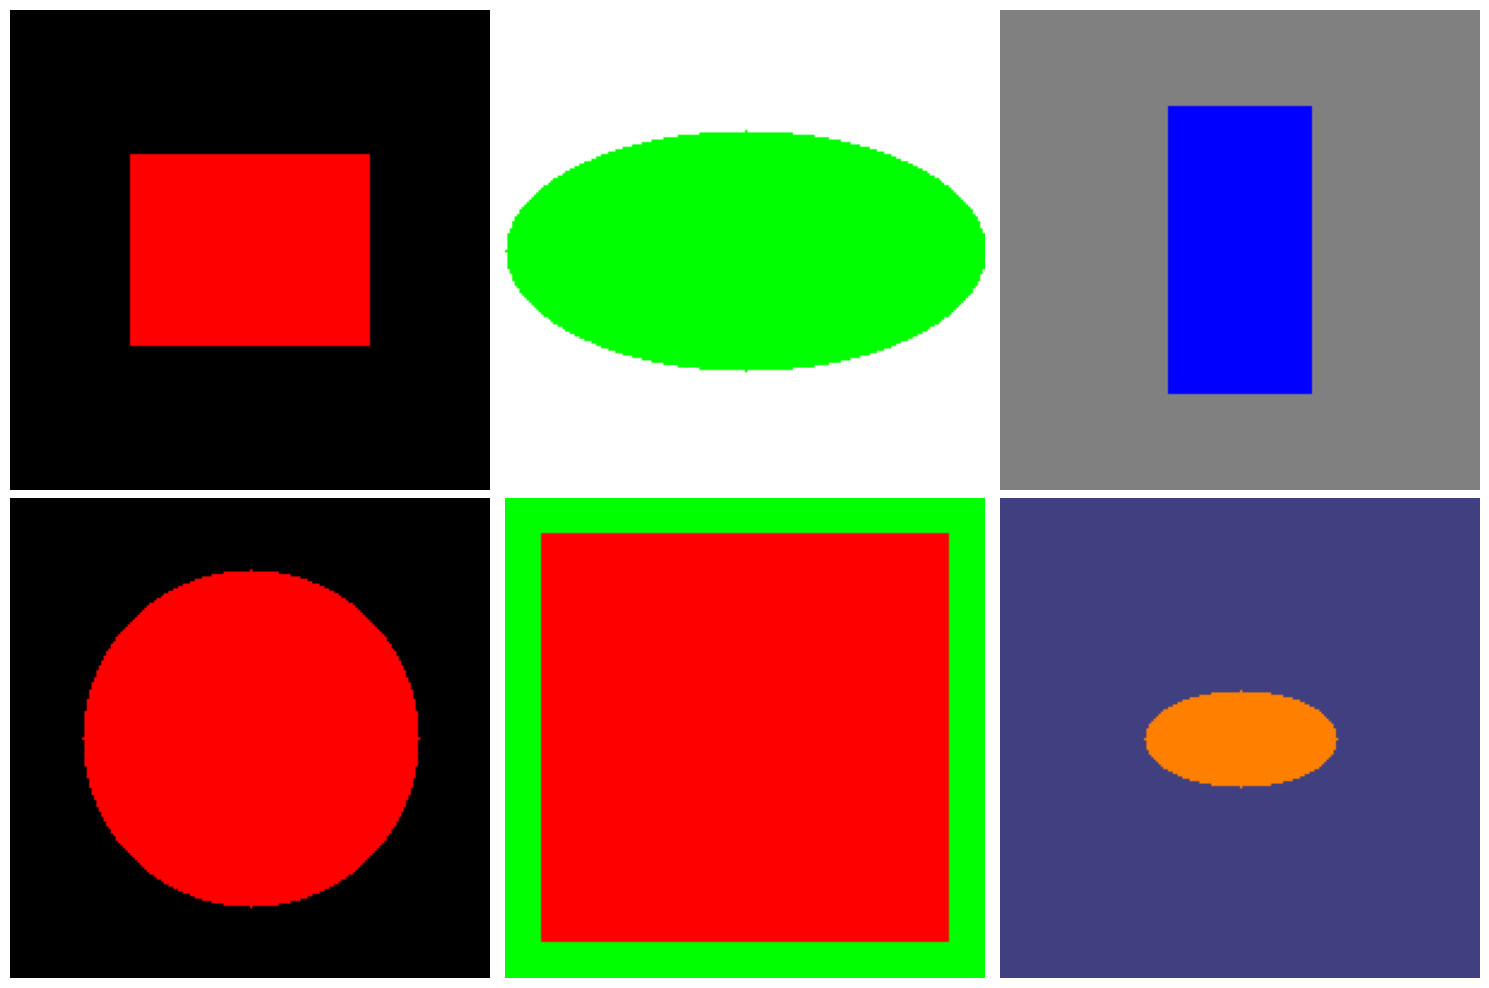

In [ ]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    center_x, center_y = n // 2, m // 2
    
    x_start = max(0, center_x - a // 2)
    x_end = min(n, center_x + a // 2)
    y_start = max(0, center_y - b // 2)
    y_end = min(m, center_y + b // 2)
    
    image[y_start:y_end, x_start:x_end] = rectangle_color
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    x0, y0 = n // 2, m // 2
    
    y, x = np.ogrid[:m, :n]
    
    ellipse_mask = ((x - x0) / a)**2 + ((y - y0) / b)**2 <= 1
    
    image[ellipse_mask] = ellipse_color
    
    return image


def visualize_results():
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    rect1 = draw_rectangle(a=100, b=80, m=200, n=200,
                          rectangle_color=(255, 0, 0),
                          background_color=(0, 0, 0))
    axes[0, 0].imshow(rect1)
    axes[0, 0].axis('off')
    
    ellipse1 = draw_ellipse(a=100, b=50, m=200, n=200,
                           ellipse_color=(0, 255, 0),
                           background_color=(255, 255, 255))
    axes[0, 1].imshow(ellipse1)
    axes[0, 1].axis('off')
    
    rect2 = draw_rectangle(a=60, b=120, m=200, n=200,
                          rectangle_color=(0, 0, 255),
                          background_color=(128, 128, 128))
    axes[0, 2].imshow(rect2)
    axes[0, 2].axis('off')
    
    circle = draw_ellipse(a=70, b=70, m=200, n=200,
                         ellipse_color=(255, 0, 0),
                         background_color=(0, 0, 0))
    axes[1, 0].imshow(circle)
    axes[1, 0].axis('off')
    
    rect3 = draw_rectangle(a=170, b=170, m=200, n=200,
                          rectangle_color=(255, 0, 0),
                          background_color=(0, 255, 0))
    axes[1, 1].imshow(rect3)
    axes[1, 1].axis('off')
    
    ellipse2 = draw_ellipse(a=40, b=20, m=200, n=200,
                           ellipse_color=(255, 128, 0),
                           background_color=(64, 64, 128))
    axes[1, 2].imshow(ellipse2)
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()


visualize_results()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
def analyze_time_series(series, p):
    arr = np.array(series)

    mean = float(np.mean(arr))
    var = float(np.var(arr))
    std = float(np.std(arr))

    local_max = []
    local_min = []

    for i in range(1, len(arr) - 1):
        if arr[i] > arr[i - 1] and arr[i] > arr[i + 1]:
            local_max.append(i)
        elif arr[i] < arr[i - 1] and arr[i] < arr[i + 1]:
            local_min.append(i)

    slide_average = []
    for i in range(len(arr) - p + 1):
        window = arr[i:i + p]
        slide_average.append(float(np.mean(window)))

    return {
        'МатОжидание': mean,
        'Дисперсия': var,
        'СКО': std,
        'Локальные максимумы': local_max,
        'Локальные минимумы': local_min,
        'Скользящее среднее': slide_average
    }


class TestAnalyzeTimeSeries(unittest.TestCase):
    def test_analyze_time_series_basic(self):
        series = [1, 2, 3, 2, 1]
        result = analyze_time_series(series, p=3)
        self.assertAlmostEqual(result['МатОжидание'], 1.8, places=6)
        self.assertAlmostEqual(result['Дисперсия'], 0.56, places=6)
        self.assertAlmostEqual(result['СКО'], 0.748331, places=6)
        self.assertEqual(result['Локальные максимумы'], [2])
        self.assertEqual(result['Локальные минимумы'], [])
        self.assertEqual(result['Скользящее среднее'], [2.0, 2.3333333333333335, 2.0])

    def test_analyze_time_series_with_extremum(self):
        series = [1, 3, 2, 4, 1]
        result = analyze_time_series(series, p=2)
        self.assertEqual(result['Локальные максимумы'], [1, 3])
        self.assertEqual(result['Локальные минимумы'], [2])
        self.assertEqual(result['Скользящее среднее'], [2.0, 2.5, 3.0, 2.5])  


loader = unittest.TestLoader()
suite = loader.loadTestsFromTestCase(TestAnalyzeTimeSeries)
runner = unittest.TextTestRunner()
result = runner.run(suite)
    

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [219]:
def one_hot_encoding(vector):
    if len(vector) == 0:
        return []
    
    vec = np.array(vector)

    length = int(vec.max()) + 1
    one_hot = np.zeros((vec.shape[0], length), dtype=int)
    one_hot[np.arange(vec.shape[0]), vec] = 1
    return one_hot.tolist()


class TestOneHotEncoding(unittest.TestCase):
    def test_one_hot_encode_basic(self):
        labels = [0, 2, 3, 0]
        expected = [
            [1, 0, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [1, 0, 0, 0]
        ]
        result = one_hot_encoding(labels)
        self.assertEqual(result, expected)

    def test_one_hot_encode_single_class(self):
        labels = [0, 0, 0]
        expected = [[1], [1], [1]]
        result = one_hot_encoding(labels)
        self.assertEqual(result, expected)

    def test_one_hot_encode_consecutive(self):
        labels = [0, 1, 2]
        expected = [
            [1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ]
        result = one_hot_encoding(labels)
        self.assertEqual(result, expected)

    def test_one_hot_encode_empty(self):
        self.assertEqual(one_hot_encoding([]), [])

    def test_one_hot_encode_empty(self):
        labels = [0, 1, 10]
        expected = [
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
        ]
        result = one_hot_encoding(labels)
        self.assertEqual(result, expected)
    

loader = unittest.TestLoader()
suite = loader.loadTestsFromTestCase(TestOneHotEncoding)
runner = unittest.TextTestRunner()
result = runner.run(suite)


....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK
